In [ ]:
## ARIMA : This is just experimentation and learning about ARIMA. And not the actual file for ARIMA on commodities.

In [1]:
#Load Libraries
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import pandas as pd
import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest


from statsmodels.tsa.seasonal import seasonal_decompose
import scipy

import numpy as np
import seaborn as sns
# import matplotlib
# import pandas
# import statsmodels

import sklearn

from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
from math import sqrt


import pandas as pd
from matplotlib import pyplot
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
    
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame



In [ ]:
# t-n: A prior or lag time (e.g. t-1 for the previous time).
#  t: A current time and point of reference.
#  t+n: A future or forecast time (e.g. t+1 for the next time).


#Components of Time Series
#Time series analysis provides a body of techniques to better understand a dataset. Perhaps the most useful of these is the decomposition of a time series into 4 constituent parts:
#Level. The baseline value for the series if it were a straight line.
#Trend. The optional and often linear increasing or decreasing behavior of the series over time.
#Seasonality. The optional repeating patterns or cycles of behavior over time.
#Noise. The optional variability in the observations that cannot be explained by the
#model.
#All time series have a level, most have noise, and the trend and seasonality are optional.
#Supervised learning problems can be further grouped into regression and classification problems.
#Classification: A classification problem is when the output variable is a category, such
#as red and blue or disease and no disease.
#Regression: A regression problem is when the output variable is a real value, such as
#dollars or weight. The contrived example above is a regression problem.

#-

#We will look at three classes of features that we can create from our
#time series dataset:
#Date Time Features: these are components of the time step itself for each observation.
#Lag Features: these are values at prior time steps.
#Window Features: these are a summary of values over a fixed window of prior time
#steps


#6.1 Time Series Visualization
#1. Line Plots.
#2. Histograms and Density Plots.
#3. Box and Whisker Plots.
#4. Heat Maps.
#5. Lag Plots or Scatter Plots.
#6. Autocorrelation Plots.



In [2]:
# load dataset using read_csv()

from pandas import read_csv

series = read_csv('../Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

print(type(series))

print(series.head())

<class 'pandas.core.series.Series'>
Year
1998-01-01    235884000
1999-01-01    361362000
2000-01-01    303700000
2001-01-01    376488000
2002-01-01    494416000
Name: BarleyProd, dtype: int64


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_1211/1692730468.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,


In [4]:
print(series.size)

24


In [5]:
print(series['1999-01'])

Year
1999-01-01    361362000
Name: BarleyProd, dtype: int64


In [6]:
print(series.describe())

count    2.400000e+01
mean     2.801824e+09
std      2.135554e+09
min      2.358840e+08
25%      4.864780e+08
50%      4.202762e+09
75%      4.475199e+09
max      5.683040e+09
Name: BarleyProd, dtype: float64


In [3]:
dataframe = DataFrame()
#dataframe['month'] = [series.index[i].month for i in range(len(series))]
#dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['Year'] = [series.index[i].year for i in range(len(series))]
dataframe['BarleyProd'] = [series[i] for i in range(len(series))]


print(dataframe.head(5))

   Year  BarleyProd
0  1998   235884000
1  1999   361362000
2  2000   303700000
3  2001   376488000
4  2002   494416000


In [4]:
Prod = DataFrame(series.values)
dataframe = pd.concat([Prod.shift(1), Prod], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

             t        t+1
0          NaN  235884000
1  235884000.0  361362000
2  361362000.0  303700000
3  303700000.0  376488000
4  376488000.0  494416000


In [18]:
Prod1 = DataFrame(series.values)
shifted = Prod1.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, Prod1], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))


   mean(t-1,t)        t+1
0          NaN  235884000
1          NaN  361362000
2  298623000.0  303700000
3  332531000.0  376488000
4  340094000.0  494416000


In [20]:
# Below is an example of calculating the minimum, mean, and maximum values of the expanding window on the daily temperature dataset.

Prod2 = DataFrame(series.values)
window = Prod2.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), Prod2.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

           min          mean          max          t+1
0  235884000.0  2.358840e+08  235884000.0  361362000.0
1  235884000.0  2.986230e+08  361362000.0  303700000.0
2  235884000.0  3.003153e+08  361362000.0  376488000.0
3  235884000.0  3.193585e+08  376488000.0  494416000.0
4  235884000.0  3.543700e+08  494416000.0  458582000.0


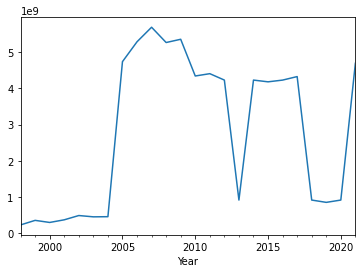

In [21]:
#Line Plot

series.plot()
pyplot.show()

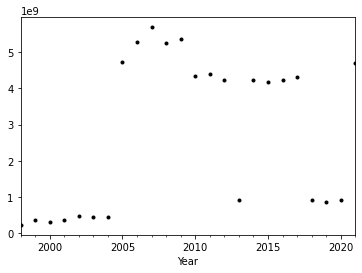

In [22]:
# Dot Plot

series.plot(style='k.')
pyplot.show()

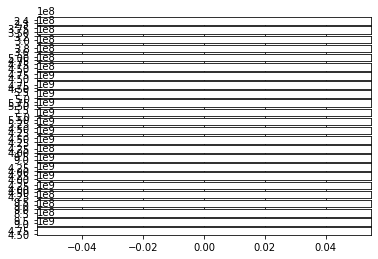

In [24]:
# create stacked line plots

groups = series.groupby(pd.Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

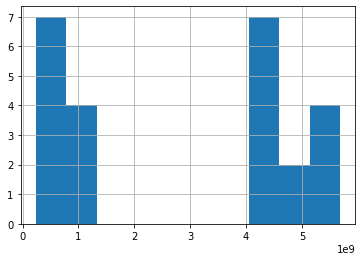

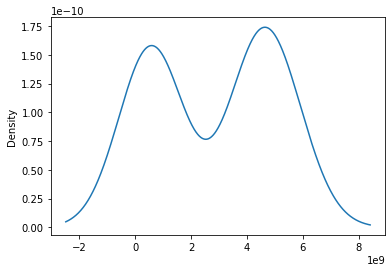

In [26]:
# Histogram and Density Plots

series.hist()
pyplot.show()

series.plot(kind='kde')
pyplot.show()

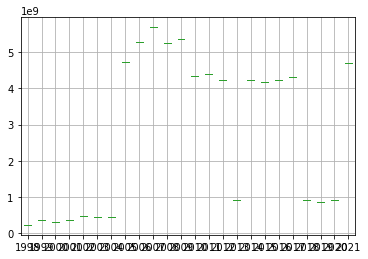

In [28]:
# Box and Whisker Plots by Interval

groups = series.groupby(pd.Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()

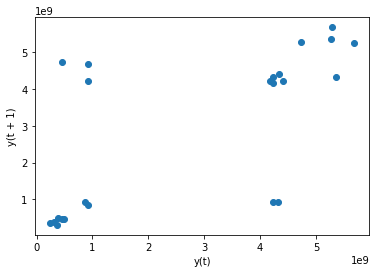

In [33]:
# Lag Scatter Plots

from pandas.plotting import lag_plot

lag_plot(series)
pyplot.show()

In [34]:
## Trying on Oats


series1 = read_csv('/Users/nehag/Desktop/Final Project/Data/OatsArima.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

print(type(series1))

print(series1.head())

<class 'pandas.core.series.Series'>
Year
1998-01-01    247882000
1999-01-01    239549000
2000-01-01    251854000
2001-01-01    241377000
2002-01-01    227767000
Name: OatsProd, dtype: int64


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10136/2542845717.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series1 = read_csv('/Users/nehag/Desktop/Final Project/Data/OatsArima.csv', header=0, index_col=0, parse_dates=True,


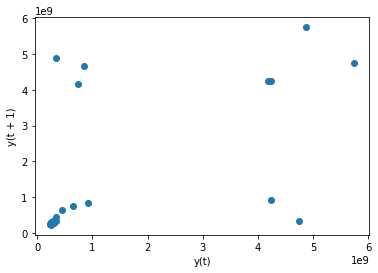

In [35]:
# Lag Scatter Plots for Oats

from pandas.plotting import lag_plot

lag_plot(series1)
pyplot.show()

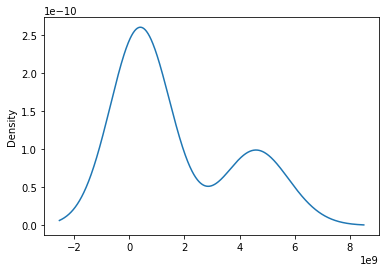

In [36]:
# Density plot for Oats


series1.plot(kind='kde')
pyplot.show()

In [44]:
# Barley_DS['BarleyLog'] = np.log(Barley_DS['Barley'])

Oats1 = pd.read_csv("/Users/nehag/Desktop/Final Project/Data/OatsArima.csv")

Oats1['OatsLog'] = np.log(Oats1['OatsProd'])
Oats1['OatsSQRT'] = np.sqrt(Oats1['OatsProd'])



/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OatsLog', ylabel='Density'>

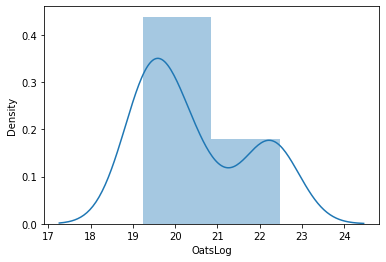

In [46]:
sns.distplot(Oats1['OatsLog'])



/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OatsSQRT', ylabel='Density'>

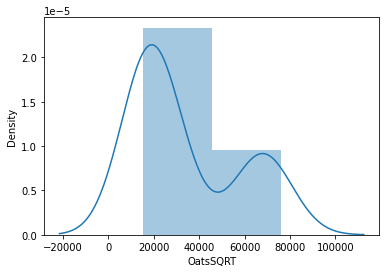

In [47]:
sns.distplot(Oats1['OatsSQRT'])

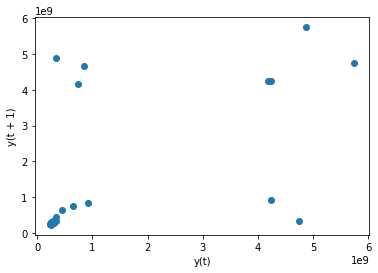

In [48]:
# Lag Plot

lag_plot(series1)
pyplot.show()

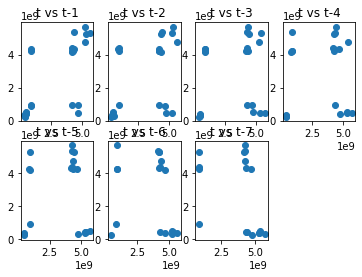

In [51]:
# Create Multiple Scatter Logs plot Barley

values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
    
pyplot.show()

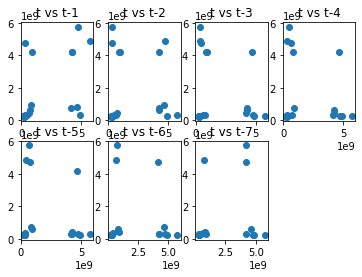

In [52]:
# Create Multiple Scatter Logs plot Oats


values = DataFrame(series1.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe1 = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe1.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe1['t'].values, y=dataframe1['t-'+str(i)].values)
    
pyplot.show()

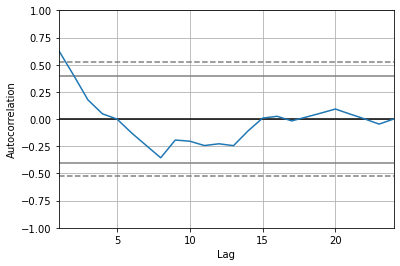

In [53]:
# create an autocorrelation plot Barley

autocorrelation_plot(series)
pyplot.show()

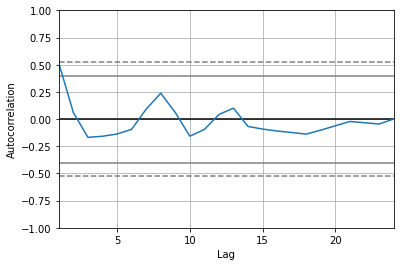

In [54]:
# create an autocorrelation plot Oats

autocorrelation_plot(series1)
pyplot.show()

In [73]:
# upsample to monthly intervals - Oats

from pandas import read_csv
from pandas import datetime

def parser(x):
    return datetime.strptime(x+'-01', '%Y-%m')


seriesO = read_csv('/Users/nehag/Desktop/Final Project/Data/OatsArima.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)



upsampledO = seriesO.resample('m').mean()
print(upsampledO.head(32))

Year
1998-01-31    247882000.0
1998-02-28            NaN
1998-03-31            NaN
1998-04-30            NaN
1998-05-31            NaN
1998-06-30            NaN
1998-07-31            NaN
1998-08-31            NaN
1998-09-30            NaN
1998-10-31            NaN
1998-11-30            NaN
1998-12-31            NaN
1999-01-31    239549000.0
1999-02-28            NaN
1999-03-31            NaN
1999-04-30            NaN
1999-05-31            NaN
1999-06-30            NaN
1999-07-31            NaN
1999-08-31            NaN
1999-09-30            NaN
1999-10-31            NaN
1999-11-30            NaN
1999-12-31            NaN
2000-01-31    251854000.0
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31            NaN
2000-08-31            NaN
Freq: M, Name: OatsProd, dtype: float64


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10136/108998221.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10136/108998221.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  seriesO = read_csv('/Users/nehag/Desktop/Final Project/Data/OatsArima.csv', header=0, index_col=0, parse_dates=True,


In [5]:
# upsample to monthly intervals - Barley

from pandas import read_csv
from pandas import datetime

def parser(x):
    return datetime.strptime(x+'-01', '%Y-%m')


seriesB = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)



upsampledB = seriesB.resample('m').mean()
print(upsampledB.head(32))

Year
1998-01-31    235884000.0
1998-02-28            NaN
1998-03-31            NaN
1998-04-30            NaN
1998-05-31            NaN
1998-06-30            NaN
1998-07-31            NaN
1998-08-31            NaN
1998-09-30            NaN
1998-10-31            NaN
1998-11-30            NaN
1998-12-31            NaN
1999-01-31    361362000.0
1999-02-28            NaN
1999-03-31            NaN
1999-04-30            NaN
1999-05-31            NaN
1999-06-30            NaN
1999-07-31            NaN
1999-08-31            NaN
1999-09-30            NaN
1999-10-31            NaN
1999-11-30            NaN
1999-12-31            NaN
2000-01-31    303700000.0
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31            NaN
2000-08-31            NaN
Freq: M, Name: BarleyProd, dtype: float64


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_1211/3599342902.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_1211/3599342902.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  seriesB = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,


In [59]:
# We can see that the resample() function has created the rows by putting NaN values in the new values.
#Next, we can interpolate the missing values at this new frequency. 
# The Series Pandas object provides an interpolate() function to interpolate missing values, 
# and there is a nice selection of simple and more complex interpolation functions. 
#  A good starting point is to use a linear interpolation. 
# This draws a straight line between available data, in this case on the first of the month, 
# and fills in values at the chosen frequency from this line.

Year
1998-01-31    2.478820e+08
1998-02-28    2.471876e+08
1998-03-31    2.464932e+08
1998-04-30    2.457988e+08
1998-05-31    2.451043e+08
1998-06-30    2.444099e+08
1998-07-31    2.437155e+08
1998-08-31    2.430211e+08
1998-09-30    2.423267e+08
1998-10-31    2.416322e+08
1998-11-30    2.409378e+08
1998-12-31    2.402434e+08
1999-01-31    2.395490e+08
1999-02-28    2.405744e+08
1999-03-31    2.415998e+08
1999-04-30    2.426252e+08
1999-05-31    2.436507e+08
1999-06-30    2.446761e+08
1999-07-31    2.457015e+08
1999-08-31    2.467269e+08
1999-09-30    2.477523e+08
1999-10-31    2.487778e+08
1999-11-30    2.498032e+08
1999-12-31    2.508286e+08
2000-01-31    2.518540e+08
2000-02-29    2.509809e+08
2000-03-31    2.501078e+08
2000-04-30    2.492348e+08
2000-05-31    2.483617e+08
2000-06-30    2.474886e+08
2000-07-31    2.466155e+08
2000-08-31    2.457424e+08
Freq: M, Name: OatsProd, dtype: float64


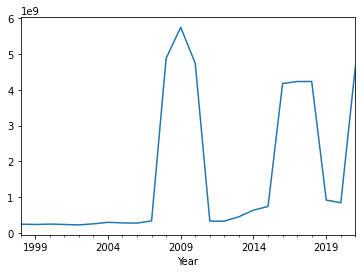

In [75]:
# upsample to daily intervals with linear interpolation - Oats

interpolatedO = upsampledO.interpolate(method='linear')
print(interpolatedO.head(32))
interpolatedO.plot()
pyplot.show()

Year
1998-01-31    2.358840e+08
1998-02-28    2.463405e+08
1998-03-31    2.567970e+08
1998-04-30    2.672535e+08
1998-05-31    2.777100e+08
1998-06-30    2.881665e+08
1998-07-31    2.986230e+08
1998-08-31    3.090795e+08
1998-09-30    3.195360e+08
1998-10-31    3.299925e+08
1998-11-30    3.404490e+08
1998-12-31    3.509055e+08
1999-01-31    3.613620e+08
1999-02-28    3.565568e+08
1999-03-31    3.517517e+08
1999-04-30    3.469465e+08
1999-05-31    3.421413e+08
1999-06-30    3.373362e+08
1999-07-31    3.325310e+08
1999-08-31    3.277258e+08
1999-09-30    3.229207e+08
1999-10-31    3.181155e+08
1999-11-30    3.133103e+08
1999-12-31    3.085052e+08
2000-01-31    3.037000e+08
2000-02-29    3.097657e+08
2000-03-31    3.158313e+08
2000-04-30    3.218970e+08
2000-05-31    3.279627e+08
2000-06-30    3.340283e+08
2000-07-31    3.400940e+08
2000-08-31    3.461597e+08
Freq: M, Name: BarleyProd, dtype: float64


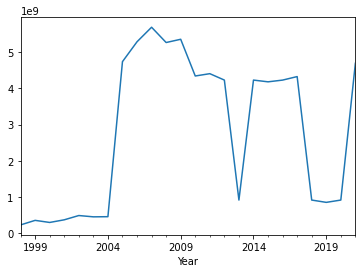

In [6]:
# upsample to daily intervals with linear interpolation - Barley

interpolatedB = upsampledB.interpolate(method='linear')
print(interpolatedB.head(32))
interpolatedB.plot()
pyplot.show()

In [12]:
split_point = len(interpolatedB) - 24

dataset, validation = interpolatedB[0:split_point], interpolatedB[split_point:]


In [13]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 253, Validation 24


In [16]:
# evaluate a persistence model

from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True) # prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=5299314176.000, Expected=5306784768
>Predicted=5306784768.000, Expected=5314255872
>Predicted=5314255872.000, Expected=5321726464
>Predicted=5321726464.000, Expected=5329197568
>Predicted=5329197568.000, Expected=5336668160
>Predicted=5336668160.000, Expected=5344139264
>Predicted=5344139264.000, Expected=5351609856
>Predicted=5351609856.000, Expected=5267280384
>Predicted=5267280384.000, Expected=5182950400
>Predicted=5182950400.000, Expected=5098620928
>Predicted=5098620928.000, Expected=5014290944
>Predicted=5014290944.000, Expected=4929961472
>Predicted=4929961472.000, Expected=4845631488
>Predicted=4845631488.000, Expected=4761301504
>Predicted=4761301504.000, Expected=4676972032
>Predicted=4676972032.000, Expected=4592642048
>Predicted=4592642048.000, Expected=4508312576
>Predicted=4508312576.000, Expected=4423982592
>Predicted=4423982592.000, Expected=4339653120
>Predicted=4339653120.000, Expected=4344978944
>Predicted=4344978944.000, Expected=4350304768
>Predicted=43

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_1211/3981668291.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True) # prepare data


<AxesSubplot:xlabel='Year'>

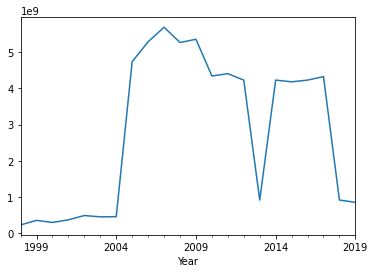

In [17]:
series.plot()

In [21]:
# statistical test for the stationarity of the time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
# create a differenced time series
def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
    value = dataset[i] - dataset[i - 1]
    diff.append(value)
  return Series(diff)
series = read_csv('dataset.csv', header=1, index_col=0, parse_dates=True, squeeze=True)
X = series.values
# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')

ADF Statistic: -2.331192
p-value: 0.162105
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_1211/1658504630.py:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('dataset.csv', header=1, index_col=0, parse_dates=True, squeeze=True)


/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


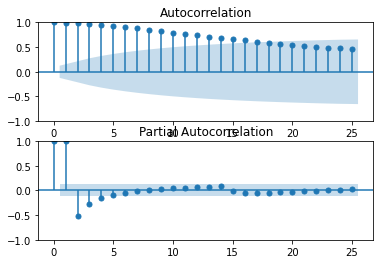

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot


pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [ ]:
#### --------

In [78]:
# Power Transforms

# Box-Cox Transform

# It can be thought of as a power tool to iron out power-based change in your time series. 
# The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, 
# depending on the underlying process that generated it. The scipy.stats library provides an implementation 
# of the Box-Cox transform. The boxcox() function3 takes an argument, called lambda, 
# that controls the type of transform to perform.
# Below are some common values for lambda:
# 􏰀 lambda = -1. is a reciprocal transform.
# 􏰀 lambda = -0.5 is a reciprocal square root transform.
# 􏰀 lambda = 0.0 is a log transform.
# 􏰀 lambda = 0.5 is a square root transform.
# 􏰀 lambda = 1.0 is no transform.

#  We can set the lambda parameter to None (the default) and let the function find a statistically tuned value.
# The following example demonstrates this usage, returning both the transformed dataset and the 
# chosen lambda value.

Lambda: 0.347467


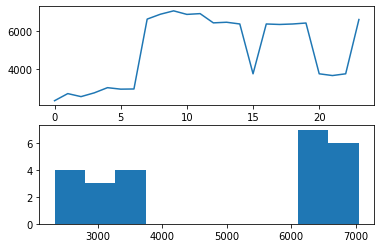

In [83]:
# Box Cox for Barley

# series - Barley


dataframeB = DataFrame(series.values)
dataframeB.columns = ['BarleyProd']
dataframeB['BarleyProd'], lam = boxcox(dataframeB['BarleyProd'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframeB['BarleyProd'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframeB['BarleyProd'])
pyplot.show()

In [ ]:
# Running the example discovers the lambda value of 0.347467. 
# We can see that this is very close to a lambda value of 0.5

Lambda: -0.507938


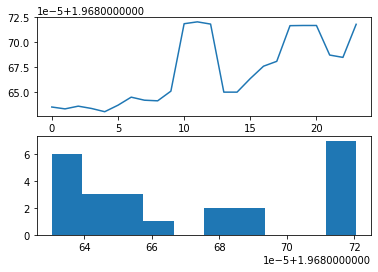

In [84]:
# BoxCox for Oats

# series1 - Oats

dataframeO = DataFrame(series1.values)
dataframeO.columns = ['OatsProd']
dataframeO['OatsProd'], lam = boxcox(dataframeO['OatsProd'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframeO['OatsProd'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframeO['OatsProd'])
pyplot.show()

In [85]:
# Running the example discovers the lambda value of -0.507938. 
# We can see that this is very close to a lambda value of - 0.5, so reciprocal square root transform.

In [ ]:
# Moving Average Smoothing



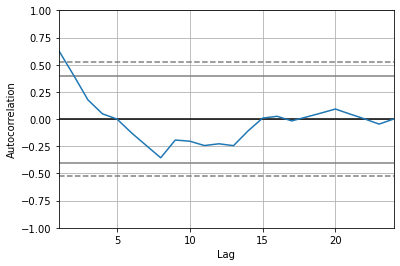

In [86]:
# autocorrelation - Barley

autocorrelation_plot(series)
pyplot.show()

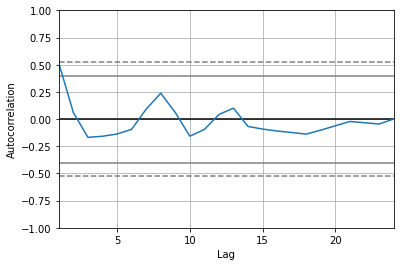

In [87]:
# autocorrelation - Oats

autocorrelation_plot(series1)
pyplot.show()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


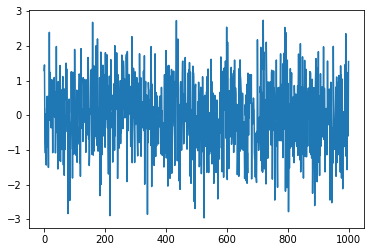

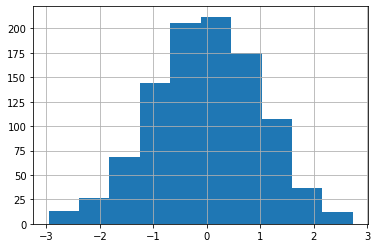

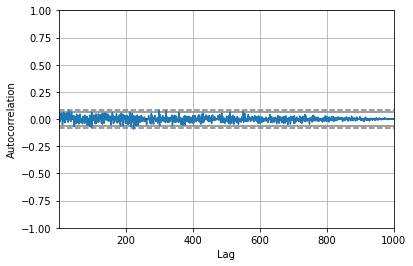

In [90]:
# calculate and plot a white noise series - Just an example

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
# summary stats
print(series.describe())
# line plot
series.plot()
pyplot.show()
# histogram plot
series.hist()
pyplot.show()
# autocorrelation
autocorrelation_plot(series)
pyplot.show()

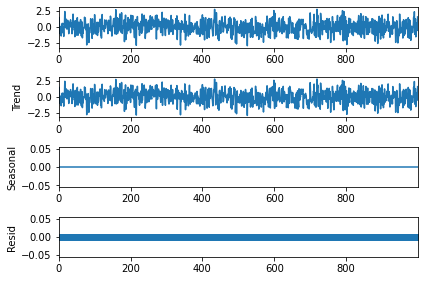

In [96]:
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

In [97]:
series

0      1.288185
1      1.449446
2      0.066336
3     -0.764544
4     -1.092173
         ...   
995    0.619316
996    0.395090
997   -0.602409
998   -0.240635
999    1.546682
Length: 1000, dtype: float64

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10136/1737546332.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,


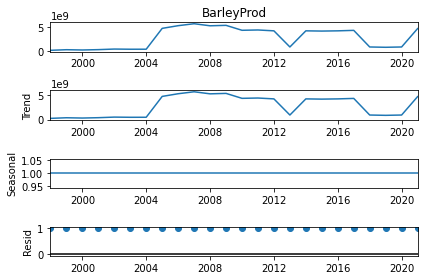

In [101]:
# Automatic Seasonal Decompose Barley

series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10136/666970874.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series1 = read_csv('/Users/nehag/Desktop/Final Project/Data/OatsArima.csv', header=0, index_col=0, parse_dates=True,


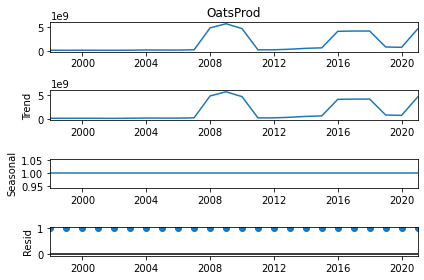

In [102]:
# Automatic Seasonal Decompose Oats

series1 = read_csv('/Users/nehag/Desktop/Final Project/Data/OatsArima.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

result = seasonal_decompose(series1, model='multiplicative')
result.plot()
pyplot.show()

In [146]:
# Stationary Time Series and Forecasting

# If we fit a stationary model to data, we assume our data are a realization of a stationary process. 
# So our first step in an analysis should be to check whether there is any evidence of a trend or seasonal 
# effects and, if there is, remove them.

# Augmented Dickey-Fuller test Barley

X = series.values


### ---- 
result = adfuller(X)

dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))



ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [106]:
# As part of the output, we get a look-up table to help determine the ADF statistic. 
# We can see that our statistic value of -1.24 is larger than the critical values.
# Meaning that we fail to reject the null hypothesis and in turn that the time series is non-stationary.

In [170]:
# calculate stationarity test of log transformed time series data
X = series.values
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.206653
p-value: 0.670727
	1%: -4.012
	5%: -3.104
	10%: -2.691


In [110]:
# Augmented Dickey-Fuller test Oats


X1 = series1.values

result = adfuller(X1)

dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -1.029223488392125,
 'pvalue': 0.7424570685124525,
 'usedlag': 5,
 'nobs': 18,
 'criticalvalues': {'1%': -3.859073285322359,
  '5%': -3.0420456927297668,
  '10%': -2.6609064197530863},
 'icbest': 636.2171410465583}

In [107]:
# As part of the output, we get a look-up table to help determine the ADF statistic. 
# We can see that our statistic value of -1.03 is larger than the critical values.
# Meaning that we fail to reject the null hypothesis and in turn that the time series is non-stationary.

In [ ]:
# Model Evaluation
# Train-Test Split

# Depending on the amount of data you have available and the amount of data required, 
# you can use splits of 50-50, 70-30 and 90-10. It is straightforward to split data in Python.

Observations: 24
Training Observations: 20
Testing Observations: 4


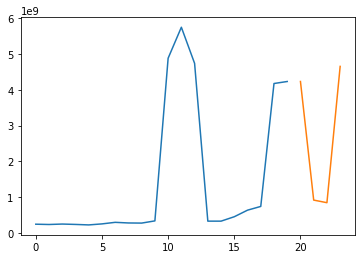

In [112]:
# Train-Test Split for Barley, 85-15

train_size = int(len(X) * 0.85)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

# plot train-test split of time series data

pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

Observations: 24
Training Observations: 20
Testing Observations: 4


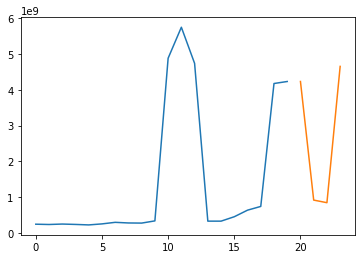

In [113]:
# Train-Test Split for Oats, 85-15



train_size = int(len(X1) * 0.85)
train, test = X1[0:train_size], X1[train_size:len(X1)]
print('Observations: %d' % (len(X1)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

# plot train-test split of time series data

pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()


In [119]:
# walk forward evaluation model for time series data - Barley
# Walk-forward validation is the gold standard of model evaluation.
# It is the k-fold cross-validation of the time series world and is recommended for your own projects.



n_train = 10
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))


train=10, test=1
train=11, test=1
train=12, test=1
train=13, test=1
train=14, test=1
train=15, test=1
train=16, test=1
train=17, test=1
train=18, test=1
train=19, test=1
train=20, test=1
train=21, test=1
train=22, test=1
train=23, test=1


In [120]:
# Persistence Algorithm Steps
# A persistence model can be implemented easily in Python. We will break this down into 4 steps:
#1. Transform the univariate dataset into a supervised learning problem.
#2. Establish the train and test datasets for the test harness.
#3. Define the persistence model.
#4. Make a forecast and establish a baseline performance.
#5. Review the complete example and plot the output. Let’s dive in.


             t        t+1
0          NaN  235884000
1  235884000.0  361362000
2  361362000.0  303700000
3  303700000.0  376488000
4  376488000.0  494416000
              0
0 -3.402715e+09
1 -6.350300e+07
2  6.350300e+07
3  3.769308e+09


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10136/2095997334.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,


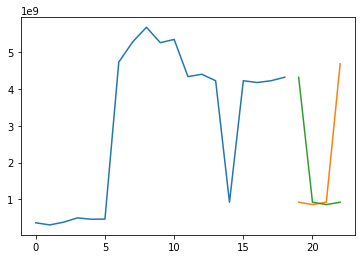

In [138]:

def parser(x):
    return datetime.strptime(x+'-01', '%Y-%m')


series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)



# Create lagged dataset
values = DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.85)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
  return x


# walk-forward validation

predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

In [ ]:
# Line plot of the persistence forecast for the Barley production dataset showing
# the training set (blue), test set (green) and predictions (red).

In [147]:

# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())



              0
0 -3.402715e+09
1 -6.350300e+07
2  6.350300e+07
3  3.769308e+09


In [159]:
# plot the confidence intervals for an ARIMA forecast

series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)


# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 4
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit()
# plot some history and the forecast with confidence intervals
model_fit.plot_predict(len(train)-4, len(train)+1)
pyplot.legend(loc='upper left')
pyplot.show()

# ---

# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
plot_acf(series, lags=31)
pyplot.show()
# ---

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10136/1117746827.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv', header=0, index_col=0, parse_dates=True,


AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [157]:
train

array([2.358840e+08, 3.613620e+08, 3.037000e+08, 3.764880e+08,
       4.944160e+08, 4.585820e+08, 4.626640e+08, 4.734966e+09,
       5.282724e+09, 5.683040e+09, 5.261960e+09, 5.351610e+09,
       4.339653e+09, 4.403565e+09, 4.227346e+09, 9.208000e+08,
       4.227000e+09, 4.178948e+09, 4.226575e+09, 4.323508e+09],
      dtype=float32)

In [158]:
test

array([9.207930e+08, 8.572900e+08, 9.207930e+08, 4.690101e+09],
      dtype=float32)

In [161]:

### -----
BarleyDS = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima.csv')
## Running auto_arima to obtain p, d, q variables
model = pm.auto_arima(BarleyDS['BarleyProd'], seasonal=False)

model




# 1,0,0 ARIMA Model
model1 = ARIMA(BarleyDS.BarleyProd, order=(1,0,0))
model_fit = model1.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             BarleyProd   No. Observations:                   24
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -542.508
Date:                Sat, 16 Jul 2022   AIC                           1091.016
Time:                        14:48:14   BIC                           1094.551
Sample:                             0   HQIC                          1091.954
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.802e+09   1.07e-11   2.61e+20      0.000     2.8e+09     2.8e+09
ar.L1          0.6660      0.164      4.050      0.000       0.344       0.988
sigma2      2.406e+18   3.81e-20   6.32e+37      0.0

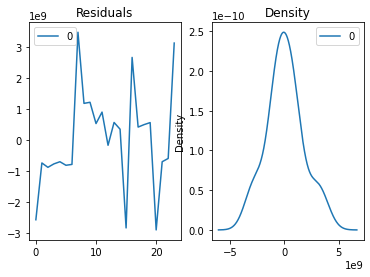

In [163]:
# Plot residual errors
import matplotlib.pyplot as plt


residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [166]:
# Actual vs Fitted

model_fit.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'